<h1>Create initial images to be used in feather tutorial</h1>

In [1]:
# import pkg_resources, os
# casa_data_dir = pkg_resources.resource_filename("casadata", "__data__")
# rc_file = open(os.path.expanduser("~/.casarc"), "a+")  # append mode
# rc_file.write("\nmeasures.directory: " + casa_data_dir)
# rc_file.close()

In [2]:
# download base images
from toolviper.utils.data import download

download("feather_sim_sd_c1_pI.im")
download("feather_sim_vla_c1_pI.im")

[2025-12-04 13:12:11,575]     INFO    viperlog:  Module path: /Users/jsteeb/miniforge3/envs/timg/lib/python3.13/site-packages/toolviper 
[2025-12-04 13:12:11,577]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List            
 ───────────────────────── 
  feather_sim_sd_c1_pI.im

[2025-12-04 13:12:11,579]     INFO    viperlog:  File exists: feather_sim_sd_c1_pI.im 


Output()

[2025-12-04 13:12:11,581]     INFO    viperlog:  Module path: /Users/jsteeb/miniforge3/envs/timg/lib/python3.13/site-packages/toolviper 
[2025-12-04 13:12:11,582]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List             
 ────────────────────────── 
  feather_sim_vla_c1_pI.im

[2025-12-04 13:12:11,583]     INFO    viperlog:  File exists: feather_sim_vla_c1_pI.im 


Output()

In [3]:
# from graphviper.dask.client import local_client
# viper_client = local_client(cores=4, memory_limit="4GB")

# import dask
# dask.config.set(scheduler="synchronous")
# dask.config.set(scheduler="threads")

<h2>Inputs to be specified by user</h2>

In [4]:
# ra, dec size, should not exceed 4096 x 4096
imsize = [1024, 1024]

# number of channels
nchan = 16

# currently, there is only one polarization and it is I

In [5]:
from xradio.image.image import make_empty_sky_image
import numpy as np

rad_per_arcsec = np.pi / 180 / 3600
skel_xds = make_empty_sky_image(
    phase_center=[0.6, -0.2],
    image_size=imsize,
    cell_size=[15 * rad_per_arcsec, 15 * rad_per_arcsec],
    frequency_coords=np.linspace(1.4e9, 1.5e9, nchan),
    pol_coords=["I"],
    time_coords=[0],
)
# does not have dim beam_param
skel_xds

<xarray.Dataset> Size: 17MB
Dimensions:            (time: 1, frequency: 16, polarization: 1, l: 1024,
                        m: 1024, beam_params_label: 3)
Coordinates:
  * time               (time) float64 8B 0.0
  * frequency          (frequency) float64 128B 1.4e+09 1.407e+09 ... 1.5e+09
  * polarization       (polarization) <U1 4B 'I'
  * l                  (l) float64 8kB 0.03723 0.03716 ... -0.03709 -0.03716
  * m                  (m) float64 8kB -0.03723 -0.03716 ... 0.03709 0.03716
  * beam_params_label  (beam_params_label) <U5 60B 'major' 'minor' 'pa'
    velocity           (frequency) float64 128B 1.1e+07 9.626e+06 ... -9.626e+06
    right_ascension    (l, m) float64 8MB 0.6383 0.6383 0.6383 ... 0.5623 0.5623
    declination        (l, m) float64 8MB -0.2371 -0.237 ... -0.1628 -0.1627
Data variables:
    *empty*
Attributes:
    data_groups:             {'base': {}}
    coordinate_system_info:  {'reference_direction': {'attrs': {'frame': 'fk5...
    type:                    image

In [6]:
from xradio.image import open_image

sel_dict = {}
if imsize[0] < 4096:
    blc = 2048 - imsize[0] // 2
    l_slice = slice(blc, blc + imsize[0])
    sel_dict["l"] = l_slice
if imsize[1] < 4096:
    blc = 2048 - imsize[1] // 2
    m_slice = slice(blc, blc + imsize[1])
    sel_dict["m"] = m_slice
xds_sd_temp = open_image("feather_sim_sd_c1_pI.im").isel(sel_dict)
print("xds_sd_temp sky shape", xds_sd_temp.SKY.shape)
print("xds_sd_temp beam shape", xds_sd_temp.BEAM_FIT_PARAMS.shape)
print("xds_sd_temp beam values", xds_sd_temp.BEAM_FIT_PARAMS.values)
xds_sd_temp

Successful readonly open of default-locked table feather_sim_sd_c1_pI.im: 1 columns, 1 rows
xds_sd_temp sky shape (1, 1, 1, 1024, 1024)
xds_sd_temp beam shape (1, 1, 1, 3)
xds_sd_temp beam values [[[[0.00407243 0.00407243 0.        ]]]]


<xarray.Dataset> Size: 21MB
Dimensions:            (time: 1, frequency: 1, polarization: 1, l: 1024,
                        m: 1024, beam_params_label: 3)
Coordinates:
  * time               (time) float64 8B 5.154e+04
  * frequency          (frequency) float64 8B 1.414e+09
  * polarization       (polarization) <U1 4B 'I'
  * l                  (l) float64 8kB 0.03723 0.03716 ... -0.03709 -0.03716
  * m                  (m) float64 8kB -0.03723 -0.03716 ... 0.03709 0.03716
  * beam_params_label  (beam_params_label) <U5 60B 'major' 'minor' 'pa'
    velocity           (frequency) float64 8B 1.352e+06
    right_ascension    (l, m) float64 8MB 0.03727 0.03727 ... 6.246 6.246
    declination        (l, m) float64 8MB -0.03724 -0.03717 ... 0.0371 0.03717
Data variables:
    SKY                (time, frequency, polarization, l, m) float32 4MB dask.array<chunksize=(1, 1, 1, 1024, 1024), meta=np.ndarray>
    BEAM_FIT_PARAMS    (time, frequency, polarization, beam_params_label) float64 24B dask.array<chunksize=(1, 1, 1, 3), meta=np.ndarray>
Attributes:
    coordinate_system_info:  {'reference_direction': {'attrs': {'frame': 'fk5...
    type:                    image
    data_groups:             {'base': {'beam_fit_params': 'BEAM_FIT_PARAMS', ...

In [7]:
xds_int_temp = open_image("feather_sim_vla_c1_pI.im").isel(sel_dict)
# xds_int_temp
print("xds_int_temp sky shape", xds_int_temp.SKY.shape)
print("xds_int_temp beam shape", xds_int_temp.BEAM_FIT_PARAMS.shape)
print("xds_int_temp beam values", xds_int_temp.BEAM_FIT_PARAMS.values)
xds_int_temp

Successful readonly open of default-locked table feather_sim_vla_c1_pI.im: 1 columns, 1 rows
xds_int_temp sky shape (1, 1, 1, 1024, 1024)
xds_int_temp beam shape (1, 1, 1, 3)
xds_int_temp beam values [[[[ 0.00031759  0.00031237 -0.05489258]]]]


<xarray.Dataset> Size: 21MB
Dimensions:            (time: 1, frequency: 1, polarization: 1, l: 1024,
                        m: 1024, beam_params_label: 3)
Coordinates:
  * time               (time) float64 8B 5.876e+04
  * frequency          (frequency) float64 8B 1.414e+09
  * polarization       (polarization) <U1 4B 'I'
  * l                  (l) float64 8kB 0.03723 0.03716 ... -0.03709 -0.03716
  * m                  (m) float64 8kB -0.03723 -0.03716 ... 0.03709 0.03716
  * beam_params_label  (beam_params_label) <U5 60B 'major' 'minor' 'pa'
    velocity           (frequency) float64 8B 2.119e+05
    right_ascension    (l, m) float64 8MB 0.03727 0.03727 ... 6.246 6.246
    declination        (l, m) float64 8MB -0.03724 -0.03717 ... 0.0371 0.03717
Data variables:
    SKY                (time, frequency, polarization, l, m) float32 4MB dask.array<chunksize=(1, 1, 1, 1024, 1024), meta=np.ndarray>
    BEAM_FIT_PARAMS    (time, frequency, polarization, beam_params_label) float64 24B dask.array<chunksize=(1, 1, 1, 3), meta=np.ndarray>
Attributes:
    coordinate_system_info:  {'reference_direction': {'attrs': {'frame': 'fk5...
    type:                    image
    data_groups:             {'base': {'beam_fit_params': 'BEAM_FIT_PARAMS', ...

In [8]:
import dask.array as da
import xarray as xr

dm = skel_xds.sizes
sky_da_zeros = da.zeros(
    [dm["time"], dm["frequency"], dm["polarization"], dm["l"], dm["m"]],
    dtype=np.float32,
)
sky_dims = list(skel_xds.dims)
sky_dims.remove("beam_params_label")
coords = ["time", "frequency", "polarization", "l", "m"]
sky_coords = {}
for c in coords:
    sky_coords[c] = skel_xds[c]
sky_xa_zeros = xr.DataArray(data=sky_da_zeros, coords=sky_coords, dims=sky_dims)
sky_xa_zeros

<xarray.DataArray 'zeros_like-33647e49cfc2744aaeddd753b445f72f' (time: 1,
                                                                 frequency: 16,
                                                                 polarization: 1,
                                                                 l: 1024,
                                                                 m: 1024)> Size: 67MB
dask.array<zeros_like, shape=(1, 16, 1, 1024, 1024), dtype=float32, chunksize=(1, 16, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * time          (time) float64 8B 0.0
  * frequency     (frequency) float64 128B 1.4e+09 1.407e+09 ... 1.5e+09
  * polarization  (polarization) <U1 4B 'I'
  * l             (l) float64 8kB 0.03723 0.03716 0.03709 ... -0.03709 -0.03716
  * m             (m) float64 8kB -0.03723 -0.03716 -0.03709 ... 0.03709 0.03716

In [9]:
beam_da_zeros = da.zeros(
    [dm["time"], dm["frequency"], dm["polarization"], dm["beam_params_label"]],
    dtype=np.float32,
)
beam_dims = ["time", "frequency", "polarization", "beam_params_label"]
beam_xa_zeros = xr.DataArray(
    beam_da_zeros.copy(),
    dims=beam_dims,
    coords={k: v for k, v in skel_xds.coords.items() if k in beam_dims + ["velocity"]},
)

beam_xa_zeros

<xarray.DataArray 'zeros_like-544ad0c68cd5d7a0178c9e787d9f081a' (time: 1,
                                                                 frequency: 16,
                                                                 polarization: 1,
                                                                 beam_params_label: 3)> Size: 192B
dask.array<zeros_like, shape=(1, 16, 1, 3), dtype=float32, chunksize=(1, 16, 1, 3), chunktype=numpy.ndarray>
Coordinates:
  * time               (time) float64 8B 0.0
  * frequency          (frequency) float64 128B 1.4e+09 1.407e+09 ... 1.5e+09
  * polarization       (polarization) <U1 4B 'I'
  * beam_params_label  (beam_params_label) <U5 60B 'major' 'minor' 'pa'
    velocity           (frequency) float64 128B 1.1e+07 9.626e+06 ... -9.626e+06

In [10]:
import copy

for i in (0, 1):
    xds = copy.deepcopy(skel_xds)
    xds["SKY"] = sky_xa_zeros.copy()
    xds["BEAM_FIT_PARAMS"] = beam_xa_zeros.copy()
    for j in range(0, nchan, 16):
        min_chan = j
        max_chan = min(j + 16, nchan)
        fx = xds_sd_temp if i == 0 else xds_int_temp
        xds["SKY"][{"frequency": slice(min_chan, max_chan)}] = fx["SKY"].values
        xds["SKY"].attrs = {"units": "Jy/beam"}
        print(f"xds {id(xds)}")
        xds["BEAM_FIT_PARAMS"][{"frequency": slice(min_chan, max_chan)}] = fx["BEAM_FIT_PARAMS"].values
        xds["BEAM_FIT_PARAMS"].attrs = {"units": "rad"}
    if i == 0:
        xds_sd = xds
    else:
        xds_int = xds
xds_int.BEAM_FIT_PARAMS.values

xds 6412969808
xds 13026019664


array([[[[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]]]], dtype=float32)

In [11]:
bytes_in_dtype = {"float32": 4, "double": 8, "complex": 16}

# chunking_dims_sizes = {'frequency':int_xds["sky"].sizes['frequency']}
# memory_singleton_chunk = 3*np.product(np.array(list(chunking_dims_sizes.values())))
xds_sd["SKY"].sizes["frequency"]

singleton_chunk_sizes = dict(xds_sd["SKY"].sizes)
del singleton_chunk_sizes["frequency"]  # Remove dimensions that will be chuncked on.
fudge_factor = 1.1
n_images_in_memory = 3.0
memory_singleton_chunk = (
    n_images_in_memory
    * np.prod(np.array(list(singleton_chunk_sizes.values())))
    * fudge_factor
    * bytes_in_dtype[str(xds_sd["SKY"].dtype)]
    / (1024**3)
)


memory_singleton_chunk

np.float64(0.012890625000000001)

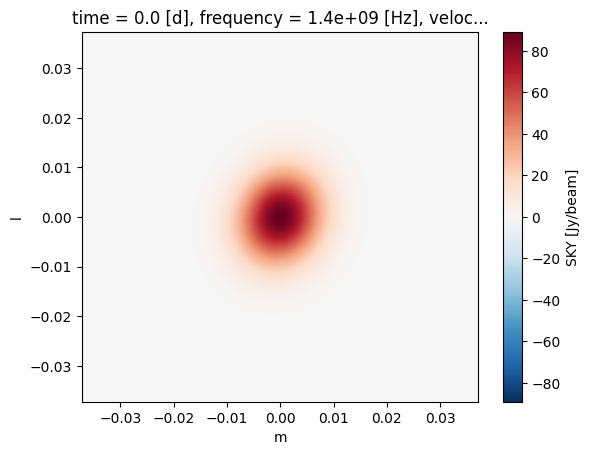

In [12]:
xds_sd["SKY"].sel(polarization="I").isel(frequency=0, time=0).plot()

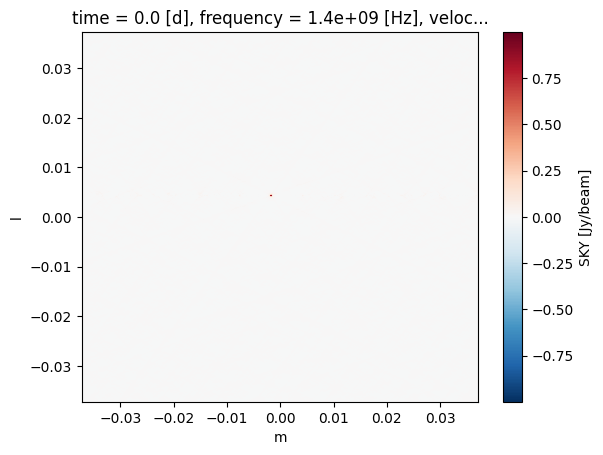

In [13]:
# This is a point source, so may not be obvious
# in this plot. It's a small dot near the center.
xds_int["SKY"].sel(polarization="I").isel(frequency=0, time=0).plot()

In [14]:
# These are the input images for the next step

import os, shutil

from xradio.image import write_image

for xds, outfile in zip([xds_sd, xds_int], ["sd.zarr", "int.zarr"]):
    if os.path.exists(outfile):
        shutil.rmtree(outfile)
    write_image(xds, outfile, "zarr")
    print(f"Wrote {outfile}")
# xds_int
xds_sd

Wrote sd.zarr
Wrote int.zarr


<xarray.Dataset> Size: 84MB
Dimensions:            (time: 1, frequency: 16, polarization: 1, l: 1024,
                        m: 1024, beam_params_label: 3)
Coordinates:
  * time               (time) float64 8B 0.0
  * frequency          (frequency) float64 128B 1.4e+09 1.407e+09 ... 1.5e+09
  * polarization       (polarization) <U1 4B 'I'
  * l                  (l) float64 8kB 0.03723 0.03716 ... -0.03709 -0.03716
  * m                  (m) float64 8kB -0.03723 -0.03716 ... 0.03709 0.03716
  * beam_params_label  (beam_params_label) <U5 60B 'major' 'minor' 'pa'
    velocity           (frequency) float64 128B 1.1e+07 9.626e+06 ... -9.626e+06
    right_ascension    (l, m) float64 8MB 0.6383 0.6383 0.6383 ... 0.5623 0.5623
    declination        (l, m) float64 8MB -0.2371 -0.237 ... -0.1628 -0.1627
Data variables:
    SKY                (time, frequency, polarization, l, m) float32 67MB dask.array<chunksize=(1, 16, 1, 1024, 1024), meta=np.ndarray>
    BEAM_FIT_PARAMS    (time, frequency, polarization, beam_params_label) float32 192B dask.array<chunksize=(1, 16, 1, 3), meta=np.ndarray>
Attributes:
    data_groups:             {'base': {}}
    coordinate_system_info:  {'reference_direction': {'attrs': {'frame': 'fk5...
    type:                    image

In [15]:
# You now have the required input images. Run feather_tutorial_v2.ipynb to use them
# to make the final feather image.